<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/house_price_with_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
plt.style.use('ggplot')



In [31]:
x = np.array([
    [1500, 3, 10],
    [1800, 4, 5],
    [2400, 4, 8],
    [3000, 5, 20],
    [2200, 3, 15],
    [1600, 2, 12],
    [2000, 4, 7],
    [2500, 5, 6],
    [1700, 3, 25],
    [2800, 4, 3]
])

y =np.array([300000, 350000, 400000, 450000, 370000, 280000, 340000, 420000, 310000, 460000])

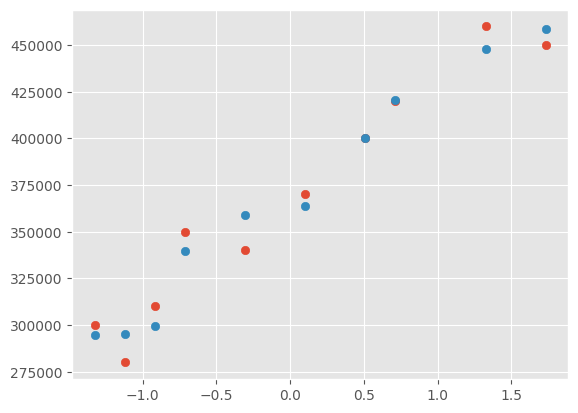

In [33]:

x_nor=StandardScaler().fit_transform(x)
model=SGDRegressor(max_iter=10000,random_state=1)
model.fit(x_nor,y)
y_pred=model.predict(x_nor)
plt.scatter(x_nor[:,0],y)
plt.scatter(x_nor[:,0],y_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


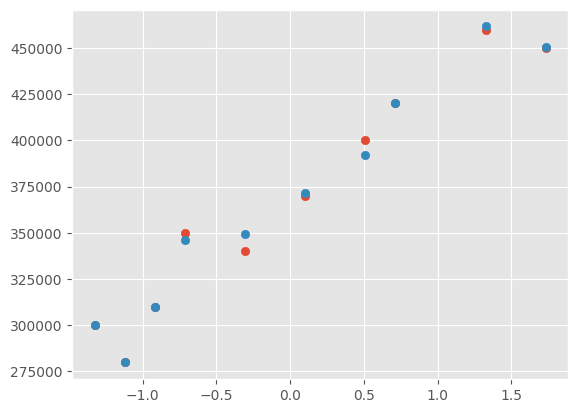

In [48]:
x_nor=StandardScaler().fit_transform(x)
x_poly=PolynomialFeatures(degree=2).fit_transform(x_nor)
model=SGDRegressor(max_iter=10000,random_state=1)
model.fit(x_poly,y)
y_pred=model.predict(x_poly)
plt.scatter(x_nor[:,0],y)
plt.scatter(x_nor[:,0],y_pred)

In [61]:
def comp_grad(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros(n)
  dj_db=0
  for i in range(m):
    err=(np.dot(x[i],w)+b)-y[i]
    for j in range(n):
      dj_dw[j]+=err*x[i,j]
    dj_db+=err
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db

def grad_dec(x,y,w,b,alpha,it,comp_grad):
  m,n=x.shape
  for i in range(it):
    dj_dw,dj_db=comp_grad(x,y,w,b)
    w-=alpha*dj_dw
    b-=alpha*dj_db

  return w,b

[301322.45991224 341721.11985555 393475.08396657 449187.31493394
 369511.8482089  279884.38245682 351226.28123547 420843.80326642
 310297.32767059 462443.40922867]


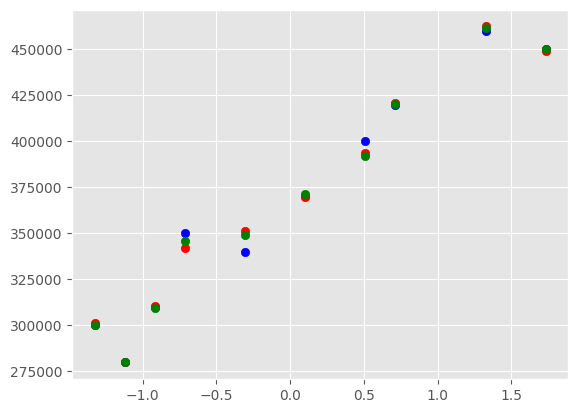

In [73]:

x_nor=StandardScaler().fit_transform(x)

x_nor=np.c_[x_nor,x_nor**2,x_nor**3]
m,n=x_nor.shape
w,b=grad_dec(x_nor,y,np.zeros(n),0,0.01,10000,comp_grad)
y_pred_1=np.dot(x_nor,w)+b
print(y_pred_1)
plt.scatter(x_nor[:,0],y,c='b')

plt.scatter(x_nor[:,0],y_pred_1,c='r')
plt.scatter(x_nor[:,0],y_pred,c='g')